### Ejercicios gestión de nulos

En este pair programming usaremos el csv que generamos en el pair programming de ayer. El objetivo del ejercicio es identificar las columnas que contienen valores nulos y aplicar un proceso de imputación para manejarlos de manera adecuada.

Instrucciones:


1. Identificación de Valores Nulos: Identifica todas las columnas que contengan valores nulos en el DataFrame.

In [1]:
#Importo las librerías.
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

import seaborn as sns
import matplotlib.pyplot as plt
import math
# Configuración

#Establezco la configuración.
pd.set_option('display.max_columns', None )

In [2]:
#Abro el csv.
df = pd.read_csv('df_world_continentes.csv', index_col=0)

#Busco los valores nulos.
porcentaje_nulos = (df.isnull().sum() / df.shape[0]) * 100
porcentaje_nulos

#Lo convierto a DataFrame.
df_nulos = pd.DataFrame(porcentaje_nulos, columns = ["%_nulos"])

#Filtro el DataFrame para quedarme con las columnas que tengan nulos.
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
abbreviation,3.608247
agriculturalland,3.608247
landarea,0.515464
armedforcessize,12.371134
birthrate,3.092784
callingcode,0.515464
capitalmajorcity,1.546392
co2emissions,3.608247
cpi,8.762887
cpichange,8.247423


In [3]:
#Busco las columnas categóricas que contengan nulos.
nulos_categoricos = df[df.columns[df.isnull().any()]].select_dtypes(include = "O").columns
print("Las columnas categóricas que tienen nulos son : \n ")
print(nulos_categoricos)

Las columnas categóricas que tienen nulos son : 
 
Index(['abbreviation', 'capitalmajorcity', 'currencycode', 'largestcity',
       'officiallanguage'],
      dtype='object')


In [4]:
#Obtengo el porcentajde de nulos por cada valor, usando 'value_counts()' e iterando por cada una de las columnas categóricas que tienen nulos. Así sabré como es la distribución de nulos por categoría.
for col in nulos_categoricos:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(df[col].value_counts() / df.shape[0])
    print("-----------------------")

La distribución de las categorías para la columna ABBREVIATION


abbreviation
AF    0.005155
PG    0.005155
NI    0.005155
NE    0.005155
NG    0.005155
        ...   
GR    0.005155
GD    0.005155
GT    0.005155
GN    0.005155
ZW    0.005155
Name: count, Length: 187, dtype: float64

-----------------------
La distribución de las categorías para la columna CAPITALMAJORCITY


capitalmajorcity
Kabul                    0.005155
Ngerulmud                0.005155
Wellington               0.005155
Managua                  0.005155
Niamey                   0.005155
                           ...   
Athens                   0.005155
St. George's, Grenada    0.005155
Guatemala City           0.005155
Conakry                  0.005155
Harare                   0.005155
Name: count, Length: 191, dtype: float64

-----------------------
La distribución de las categorías para la columna CURRENCYCODE


currencycode
EUR    0.118557
XOF    0.041237
USD    0.030928
XCD    0.030928
XAF    0.025773
         ...   
GMD    0.005155
FJD    0.005155
ETB    0.005155
ERN    0.005155
ZMW    0.005155
Name: count, Length: 132, dtype: float64

-----------------------
La distribución de las categorías para la columna LARGESTCITY


largestcity
Kabul                    0.005155
Panama City              0.005155
Managua                  0.005155
Niamey                   0.005155
Lagos                    0.005155
                           ...   
Accra                    0.005155
Macedonia                0.005155
St. George's, Grenada    0.005155
Guatemala City           0.005155
Harare                   0.005155
Name: count, Length: 188, dtype: float64

-----------------------
La distribución de las categorías para la columna OFFICIALLANGUAGE


officiallanguage
English             0.159794
French              0.128866
Spanish             0.097938
Arabic              0.092784
Portuguese          0.036082
                      ...   
Albanian            0.005155
Jamaican English    0.005155
Lao                 0.005155
Latvian             0.005155
Shona               0.005155
Name: count, Length: 76, dtype: float64

-----------------------


In [5]:
#Busco las columnas numéricas que tienen nulos.
nulos_numericos = df[df.columns[df.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_numericos)

Las columnas numéricas que tienen nulos son : 
 
Index(['agriculturalland', 'landarea', 'armedforcessize', 'birthrate',
       'callingcode', 'co2emissions', 'cpi', 'cpichange', 'fertilityrate',
       'forestedarea', 'gasolineprice', 'gdp',
       'grosstertiaryeducationenrollment', 'infantmortality', 'lifeexpectancy',
       'maternalmortalityratio', 'minimumwage', 'outofpockethealthexpenditure',
       'physiciansperthousand', 'population',
       'populationlaborforceparticipation', 'taxrevenue', 'totaltaxrate',
       'unemploymentrate', 'urbanpopulation'],
      dtype='object')


In [6]:
#Calculo el porcentaje de nulos por columna.
porcentaje_nulos_numericos = df[nulos_numericos].isnull().sum() / df.shape[0] * 100
porcentaje_nulos_numericos

#Lo convierto a DF.
df_nulos_numericos = pd.DataFrame(porcentaje_nulos_numericos, columns=['%_nulos'])
df_nulos_numericos

,%_nulos
agriculturalland,3.608247
landarea,0.515464
armedforcessize,12.371134
birthrate,3.092784
callingcode,0.515464
co2emissions,3.608247
cpi,8.762887
cpichange,8.247423
fertilityrate,3.608247
forestedarea,3.608247


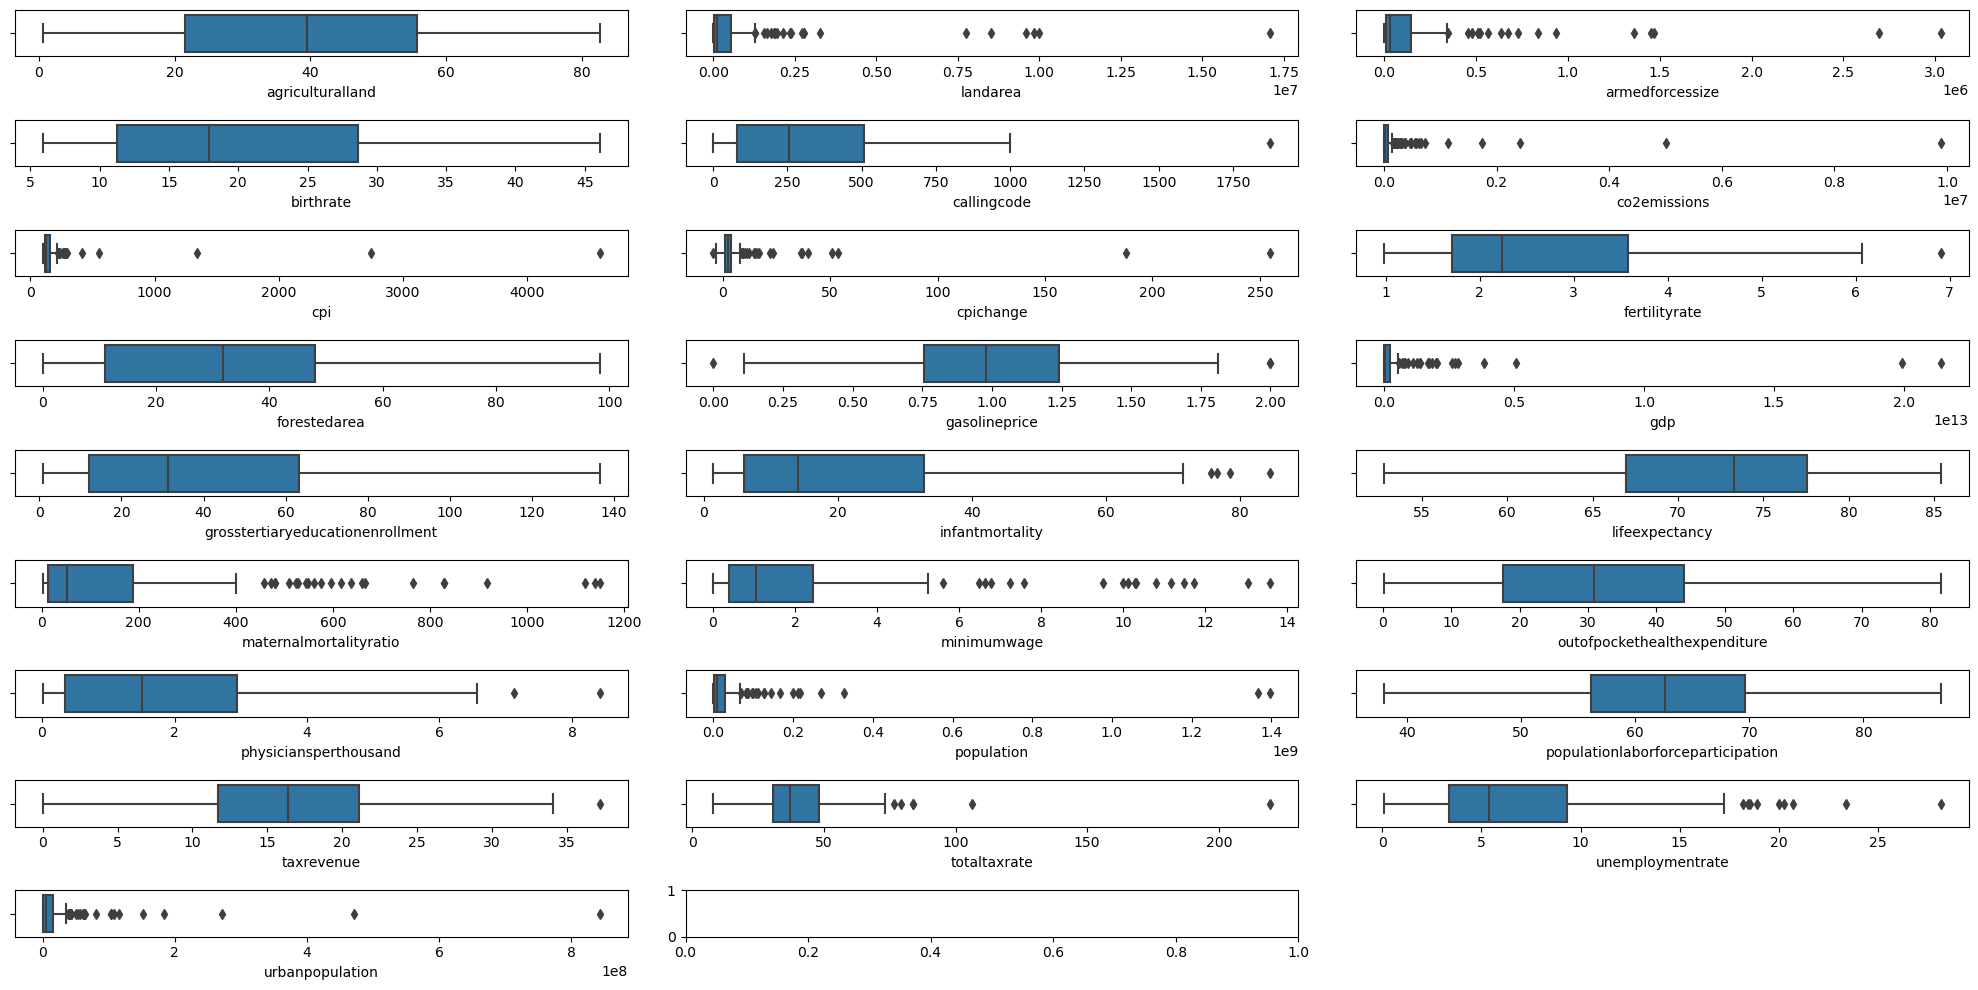

In [7]:
#Visualizamos los datos.
num_plots = len(nulos_numericos)
num_cols = 3
num_rows = math.ceil(num_plots / num_cols)

fig, axes = plt.subplots(nrows = num_rows, ncols = num_cols, figsize = (20,10)) 

axes = axes.flat

for indice, col in enumerate(nulos_numericos):
    sns.boxplot(x = col, data = df, ax = axes[indice])
    
plt.tight_layout()
fig.delaxes(axes[-1]);

2. Selección de Método de Imputación: Discute en tu compañera cuál sería la mejor estrategia para manejar los valores nulos en cada una de las columnas identificadas en el paso anterior.

**Gestión nulos categóricos**
Método fillna -> Imputamos una nueva categoría 'UnKown' a todas las variables categóricas puesto que no hay ninguna categoría que prevalezca ampliamente sobre las otras.
**Gestión nulos numéricos**
Método fillna o SimpleImputer -> Columnas que tiene valores outliner, imputando la MEDIANA.
Método fillna o SimpleImputer -> Columnas sin valores outliner y los valores concentrados, imputando la MEDIA.
    - Hay algunas columnas en las que deberemos comparar la media y la mediana para terminar de decir que valor imputar como por ejemplo la columna de 'gasolineprice'.

3. Imputación de Valores Nulos: Implementa el método de imputación seleccionado en el paso 2 para llenar los valores nulos en las columnas.

**Imputación nulos categóricos**

In [8]:
#Comienzo a gestionar los nulos de las columnas categóricas.
#En las columnas 'Abreviation', 'CapitalMayorCity' y 'LargestCity' no hay un valor predominante así que los sustituiremos por 'Unknown'.
#En las otras dos columnas 'OFFICIALLANGUAJE' y 'CURRENCYCODE' termino eligiendo sustituirlos por la categoría Unkown ya que siendo el EUR predominante, no es un % tan elevado frente al resto de monedas como para tomar la decisión de incluir los nulos bajo esta categoría.


#Creo una lista para agrupar las columnas en función de la categoría por la que las voy a cambiar.
columnas_desconocido = ['abbreviation', 'capitalmajorcity', 'largestcity', 'officiallanguage', 'currencycode']

#Comienzo iterando por los valores de la columna desconocido.
for columna in columnas_desconocido:
    df[columna]= df[columna].fillna('Unkown')

print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")
df[columnas_desconocido].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


abbreviation        0
capitalmajorcity    0
largestcity         0
officiallanguage    0
currencycode        0
dtype: int64

In [9]:
df[['abbreviation', 'capitalmajorcity', 'currencycode', 'largestcity',
       'officiallanguage']]

,abbreviation,capitalmajorcity,currencycode,largestcity,officiallanguage
0,AF,Kabul,AFN,Kabul,Pashto
1,AL,Tirana,ALL,Tirana,Albanian
2,DZ,Algiers,DZD,Algiers,Arabic
3,AD,Andorra la Vella,EUR,Andorra la Vella,Catalan
4,AO,Luanda,AOA,Luanda,Portuguese
...,...,...,...,...,...
189,VE,Caracas,VED,Caracas,Spanish
190,VN,Hanoi,VND,Ho Chi Minh City,Vietnamese
191,YE,Sanaa,YER,Sanaa,Arabic
192,ZM,Lusaka,ZMW,Lusaka,English


**Imputación nulos numéricos**

In [10]:
#Imprimo de nuevo las columnas que tienen nulos numéricos.
nulos_numericos

Index(['agriculturalland', 'landarea', 'armedforcessize', 'birthrate',
       'callingcode', 'co2emissions', 'cpi', 'cpichange', 'fertilityrate',
       'forestedarea', 'gasolineprice', 'gdp',
       'grosstertiaryeducationenrollment', 'infantmortality', 'lifeexpectancy',
       'maternalmortalityratio', 'minimumwage', 'outofpockethealthexpenditure',
       'physiciansperthousand', 'population',
       'populationlaborforceparticipation', 'taxrevenue', 'totaltaxrate',
       'unemploymentrate', 'urbanpopulation'],
      dtype='object')

In [11]:
#Para decicir si uso la media o la mediana hago un describe de cada columna para saber cuales son estos valores, y ver si hay mucha variación entre ellos.
#En caso de haberla, utilizaré la mediana.

#Itero sobre las columnas para calcular la media y la mediana y poder compararlas.
for col in nulos_numericos:
    media = df[col].mean()
    mediana = df[col].median()
    print(f"Columna: {col}")
    print(f"Media: {media}")
    print(f"Mediana: {mediana}")
    print('.......................')

Columna: agriculturalland
Media: 39.05561497326203
Mediana: 39.5
.......................
Columna: landarea
Media: 693192.5544041451
Mediana: 120538.0
.......................
Columna: armedforcessize
Media: 160205.88235294117
Mediana: 31000.0
.......................
Columna: birthrate
Media: 20.15473404255319
Mediana: 17.915
.......................
Columna: callingcode
Media: 361.1761658031088
Mediana: 256.0
.......................
Columna: co2emissions
Media: 178749.39037433156
Mediana: 12633.0
.......................
Columna: cpi
Media: 190.49129943502825
Mediana: 125.08
.......................
Columna: cpichange
Media: 6.715730337078652
Mediana: 2.3
.......................
Columna: fertilityrate
Media: 2.6894652406417108
Mediana: 2.24
.......................
Columna: forestedarea
Media: 31.88823529411765
Mediana: 31.8
.......................
Columna: gasolineprice
Media: 1.002457142857143
Mediana: 0.98
.......................
Columna: gdp
Media: 479779583091.17706
Mediana: 3626625921

In [12]:
#Creo dos listas, una para las columnas en las que utilizaré la media, y otra para las columnas en las que imputaré la mediana.
columnas_mediana = ['urbanpopulation', 'unemploymentrate', 'totaltaxrate', 'population', 'minimumwage', 'maternalmortalityratio', 'gdp', 'cpichange', 'cpi', 'co2emissions', 'physiciansperthousand', 'outofpockethealthexpenditure', 'lifeexpectancy', 'infantmortality','grosstertiaryeducationenrollment', 'gasolineprice', 'fertilityrate', 'callingcode', 'birthrate', 'armedforcessize', 'landarea','agriculturalland']
columnas_media = ['taxrevenue', 'populationlaborforceparticipation', 'forestedarea']

In [13]:
#Calculo la mediana.
mediana_columnas_nulos = df[columnas_mediana].median()

#Uso fillna para reemplazar los valores nulos con la mediana y crear nuevas columnas.
for columna in columnas_mediana:
    df[columna + '_fillna'] = df[columna].fillna(mediana_columnas_nulos[columna])

#Calculo la media.
media_columnas_nulos = df[columnas_media].mean()
#Uso fillna para reemplazar los valores nulos con la mediana y crear nuevas columnas.
for columna in columnas_media:
    df[columna + '_fillna'] = df[columna].fillna(media_columnas_nulos[columna])

In [14]:
#Imprimo las columnas del DF para comprobar que se han incorporado correctamente.
df.isnull().sum()

country                                      0
density                                      0
abbreviation                                 0
agriculturalland                             7
landarea                                     1
armedforcessize                             24
birthrate                                    6
callingcode                                  1
capitalmajorcity                             0
co2emissions                                 7
cpi                                         17
cpichange                                   16
currencycode                                 0
fertilityrate                                7
forestedarea                                 7
gasolineprice                               19
gdp                                          2
grosstertiaryeducationenrollment            12
infantmortality                              6
largestcity                                  0
lifeexpectancy                               8
maternalmorta

In [15]:
#Elimino las columnas que no me interesan.
df.drop(['agriculturalland', 'landarea', 'armedforcessize', 'birthrate', 'callingcode', 'co2emissions', 'cpi', 'cpichange', 'fertilityrate', 'forestedarea', 'gasolineprice', 'gdp', 'grosstertiaryeducationenrollment', 'infantmortality', 'lifeexpectancy', 'maternalmortalityratio', 'minimumwage', 'outofpockethealthexpenditure', 'physiciansperthousand', 'population', 'populationlaborforceparticipation', 'taxrevenue', 'totaltaxrate', 'unemploymentrate', 'urbanpopulation'], axis=1, inplace=True)
df.columns         

Index(['country', 'density', 'abbreviation', 'capitalmajorcity',
       'currencycode', 'largestcity', 'officiallanguage', 'longitude',
       'latitude', 'continent', 'urbanpopulation_fillna',
       'unemploymentrate_fillna', 'totaltaxrate_fillna', 'population_fillna',
       'minimumwage_fillna', 'maternalmortalityratio_fillna', 'gdp_fillna',
       'cpichange_fillna', 'cpi_fillna', 'co2emissions_fillna',
       'physiciansperthousand_fillna', 'outofpockethealthexpenditure_fillna',
       'lifeexpectancy_fillna', 'infantmortality_fillna',
       'grosstertiaryeducationenrollment_fillna', 'gasolineprice_fillna',
       'fertilityrate_fillna', 'callingcode_fillna', 'birthrate_fillna',
       'armedforcessize_fillna', 'landarea_fillna', 'agriculturalland_fillna',
       'taxrevenue_fillna', 'populationlaborforceparticipation_fillna',
       'forestedarea_fillna'],
      dtype='object')

In [16]:
nuevo_nombre = {
    'urbanpopulation_fillna': 'urbanpopulation',
    'unemploymentrate_fillna': 'unemploymentrate',
    'totaltaxrate_fillna': 'totaltaxrate',
    'population_fillna': 'population',
    'minimumwage_fillna': 'minimumwage',
    'maternalmortalityratio_fillna': 'maternalmortalityratio',
    'gdp_fillna': 'gdp',
    'cpichange_fillna': 'cpichange',
    'cpi_fillna': 'cpi',
    'co2emissions_fillna': 'co2emissions',
    'physiciansperthousand_fillna': 'physiciansperthousand',
    'outofpockethealthexpenditure_fillna': 'outofpockethealthexpenditure',
    'lifeexpectancy_fillna': 'lifeexpectancy',
    'infantmortality_fillna': 'infantmortality',
    'grosstertiaryeducationenrollment_fillna': 'grosstertiaryeducationenrollment',
    'gasolineprice_fillna': 'gasolineprice',
    'fertilityrate_fillna': 'fertilityrate',
    'callingcode_fillna': 'callingcode',
    'birthrate_fillna': 'birthrate',
    'armedforcessize_fillna': 'armedforcessize',
    'landarea_fillna': 'landarea',
    'agriculturalland_fillna': 'agriculturalland',
    'taxrevenue_fillna': 'taxrevenue',
    'populationlaborforceparticipation_fillna': 'populationlaborforceparticipation',
    'forestedarea_fillna': 'forestedarea'
}

df.rename(columns=nuevo_nombre, inplace=True)

In [17]:
#Compruebo que el DF está correcto
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 193
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country                            194 non-null    object 
 1   density                            194 non-null    float64
 2   abbreviation                       194 non-null    object 
 3   capitalmajorcity                   194 non-null    object 
 4   currencycode                       194 non-null    object 
 5   largestcity                        194 non-null    object 
 6   officiallanguage                   194 non-null    object 
 7   longitude                          194 non-null    float64
 8   latitude                           194 non-null    float64
 9   continent                          194 non-null    object 
 10  urbanpopulation                    194 non-null    float64
 11  unemploymentrate                   194 non-null    float64
 12 

In [18]:
#Guardo el DF como csv.
df.to_csv('df_continentes_sinnulos.csv')